In [1]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

## Data loading

In [2]:
data_path = Path().absolute().parent/'data'
train = pd.read_csv(data_path/'train.csv', index_col=0)
test = pd.read_csv(data_path/'test.csv', index_col=0)
train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,2.0,NaN,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,decreased,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,increased,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived


## Initial anlysis

In [3]:
# Создаем таблицу с числовыми колонками
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Исключаем 'id', 'hospital_number', 'lesion_1', 'lesion_2', and 'lesion_3', как неинформативные значения
numerical_cols = numerical_cols.difference(['id', 'hospital_number', 'lesion_1', 'lesion_2', 'lesion_3'])

# Создаем таблицу с категориальными колонками
categorical_cols = train.select_dtypes(include=['object']).columns

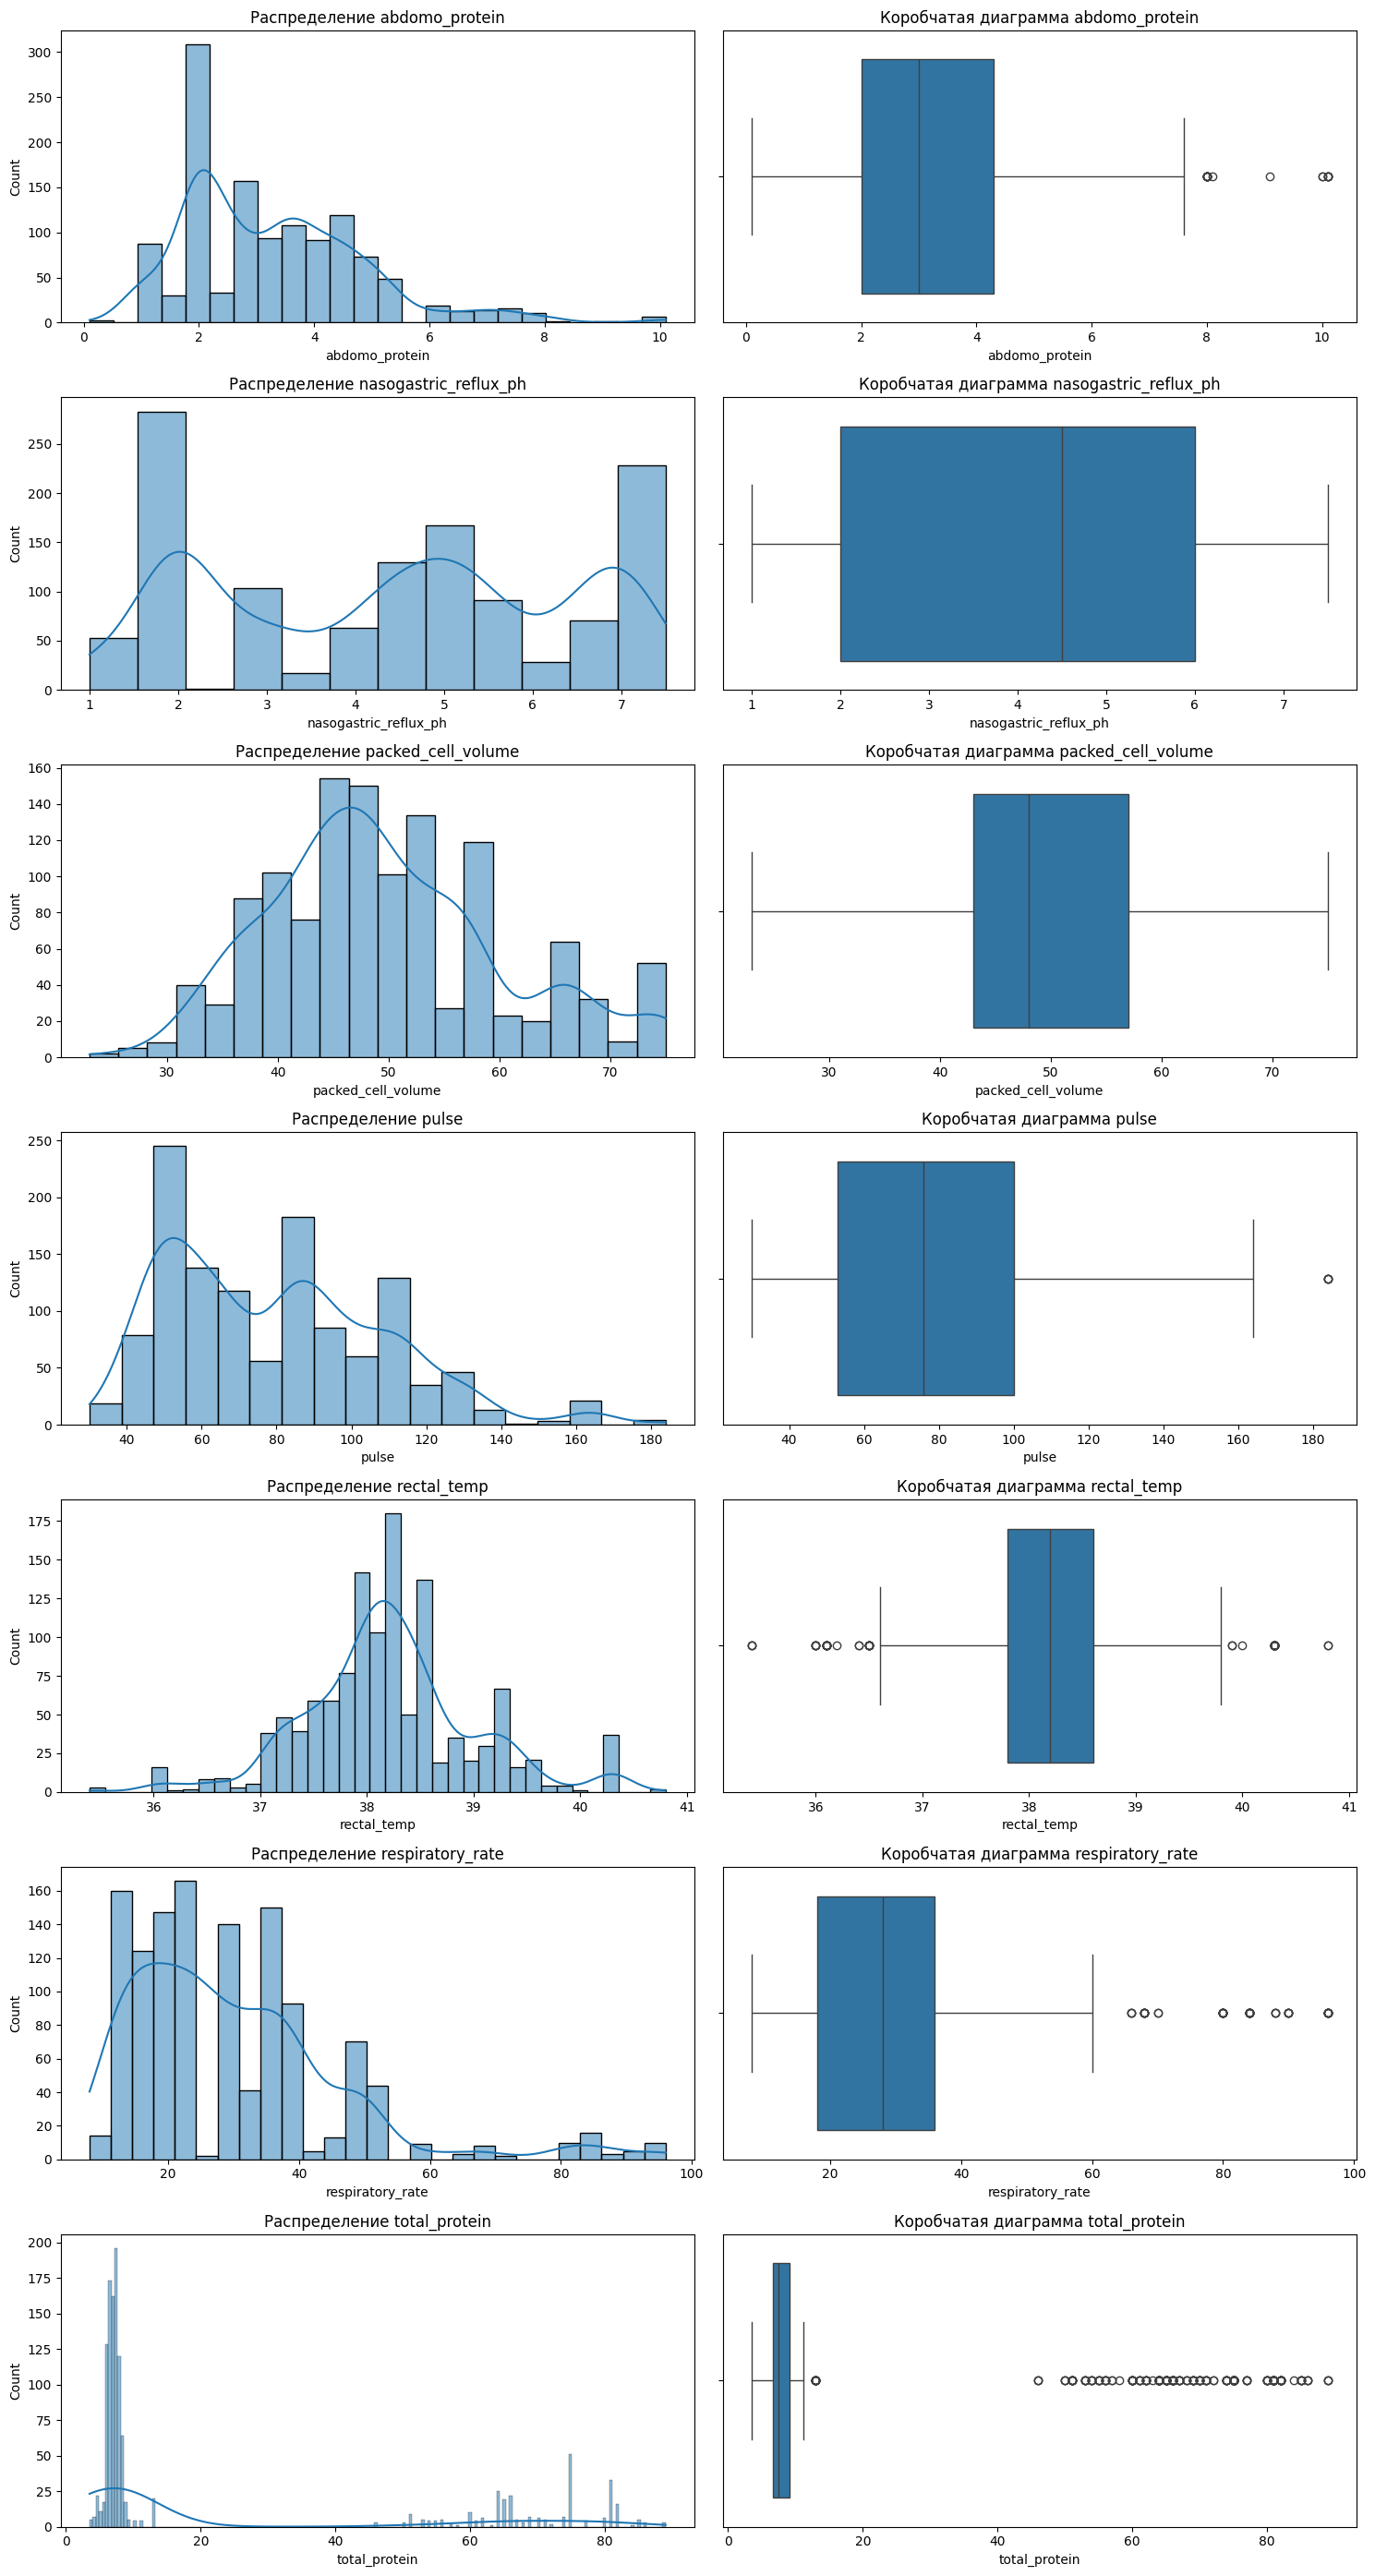

In [4]:
# Вычисляем значения фичей
fig, axs = plt.subplots(len(numerical_cols), 2, figsize=(15, 4 * len(numerical_cols)))

# Рисуем гистограммы и коробчатые диаграммы
for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Распределение {col}')
    
    sns.boxplot(x=train[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Коробчатая диаграмма {col}')

plt.tight_layout()
plt.show()

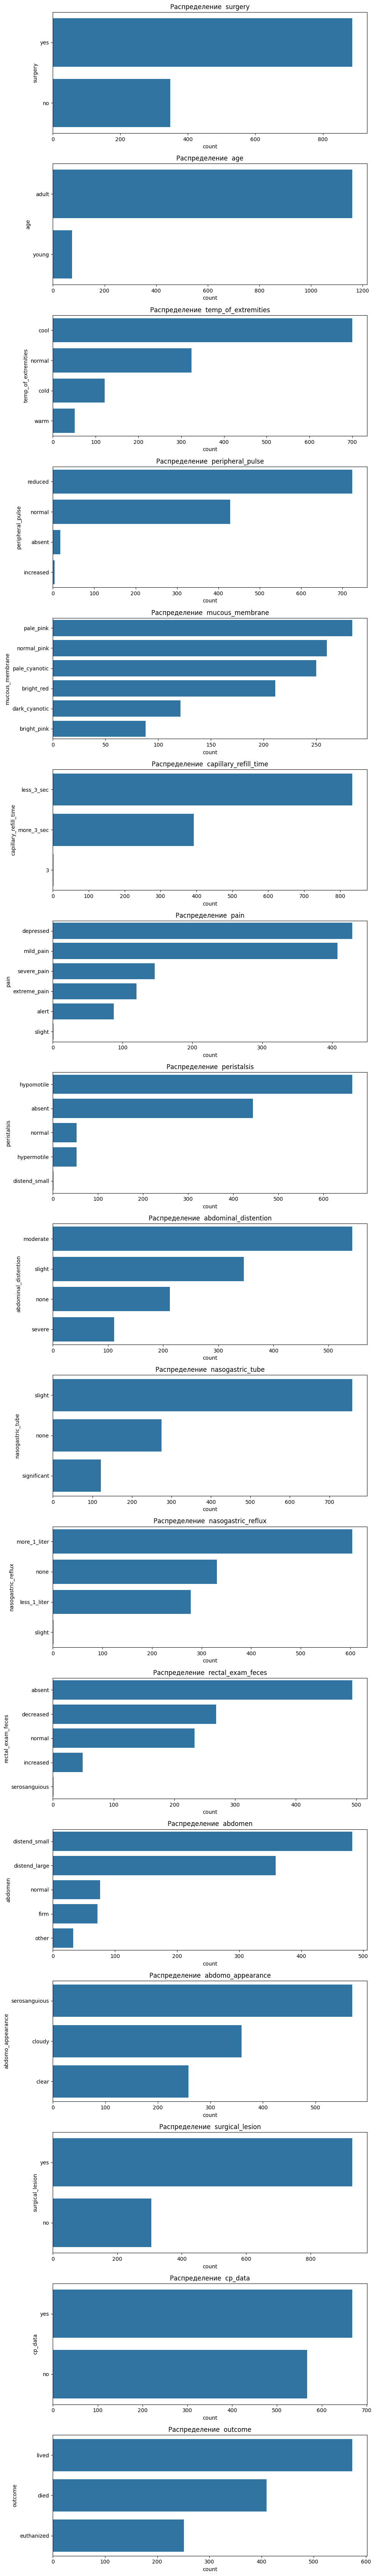

In [5]:
# Создаем таблицу с категориальными колонками
categorical_cols = train.select_dtypes(include=['object']).columns

# Вычисляем значения фичей
fig, axs = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# Рисуем графики фичей
for i, col in enumerate(categorical_cols):
    sns.countplot(y=train[col], ax=axs[i], order = train[col].value_counts().index)
    axs[i].set_title(f'Распределение  {col}')

plt.tight_layout()
plt.show()

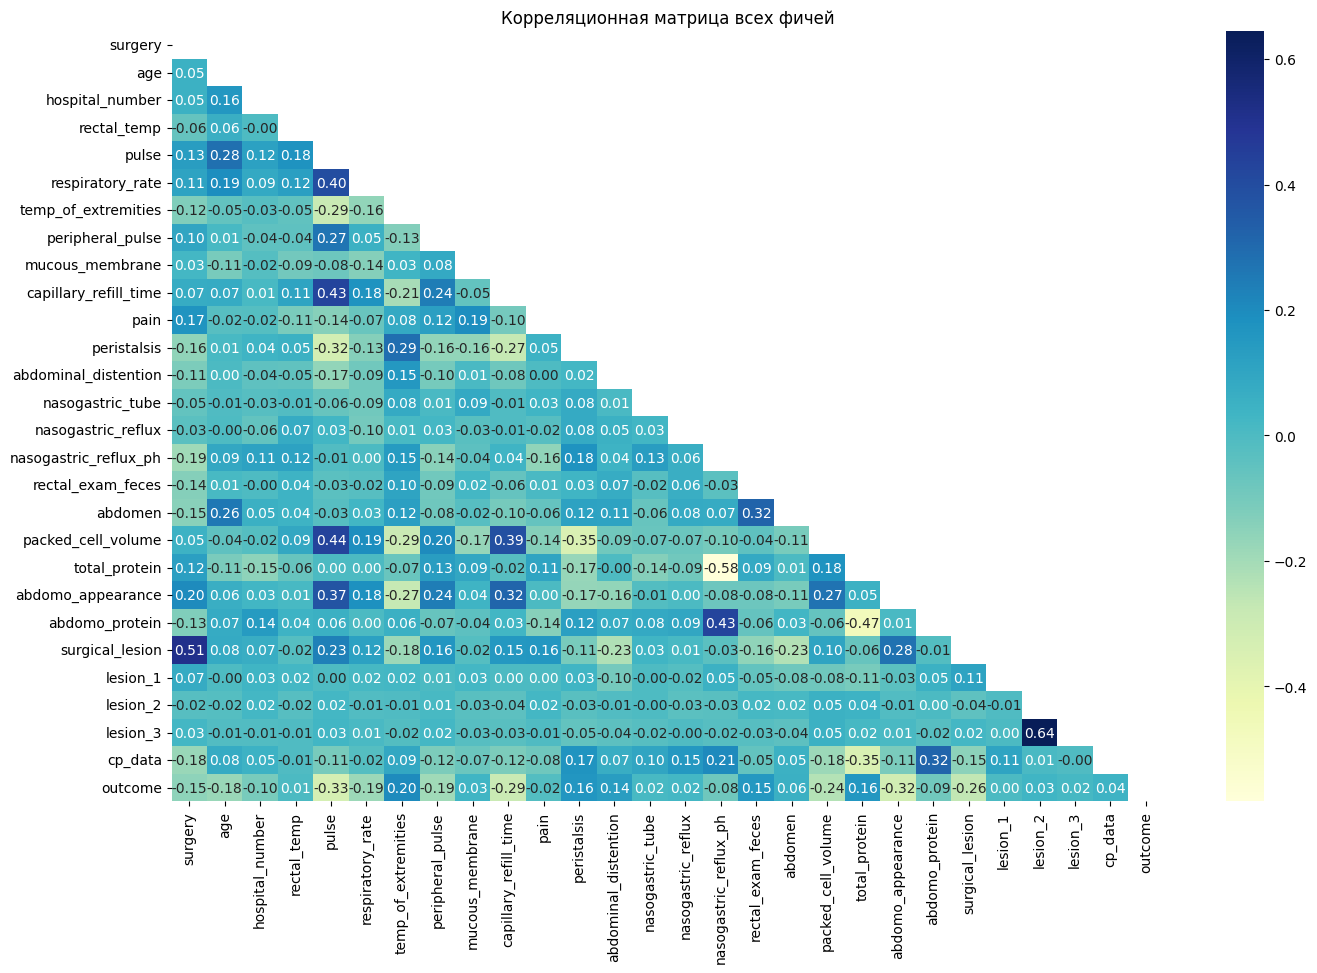

In [6]:
simple_encode = train.copy()
for column in categorical_cols:
    le = LabelEncoder()
    simple_encode[column] = le.fit_transform(train[column])

# Вычисляем корреляционную матрицу
correlation_matrix = simple_encode.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Рисуем тепловую карту корреляционной матрицы
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix,mask=mask, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Корреляционная матрица всех фичей')
plt.show()

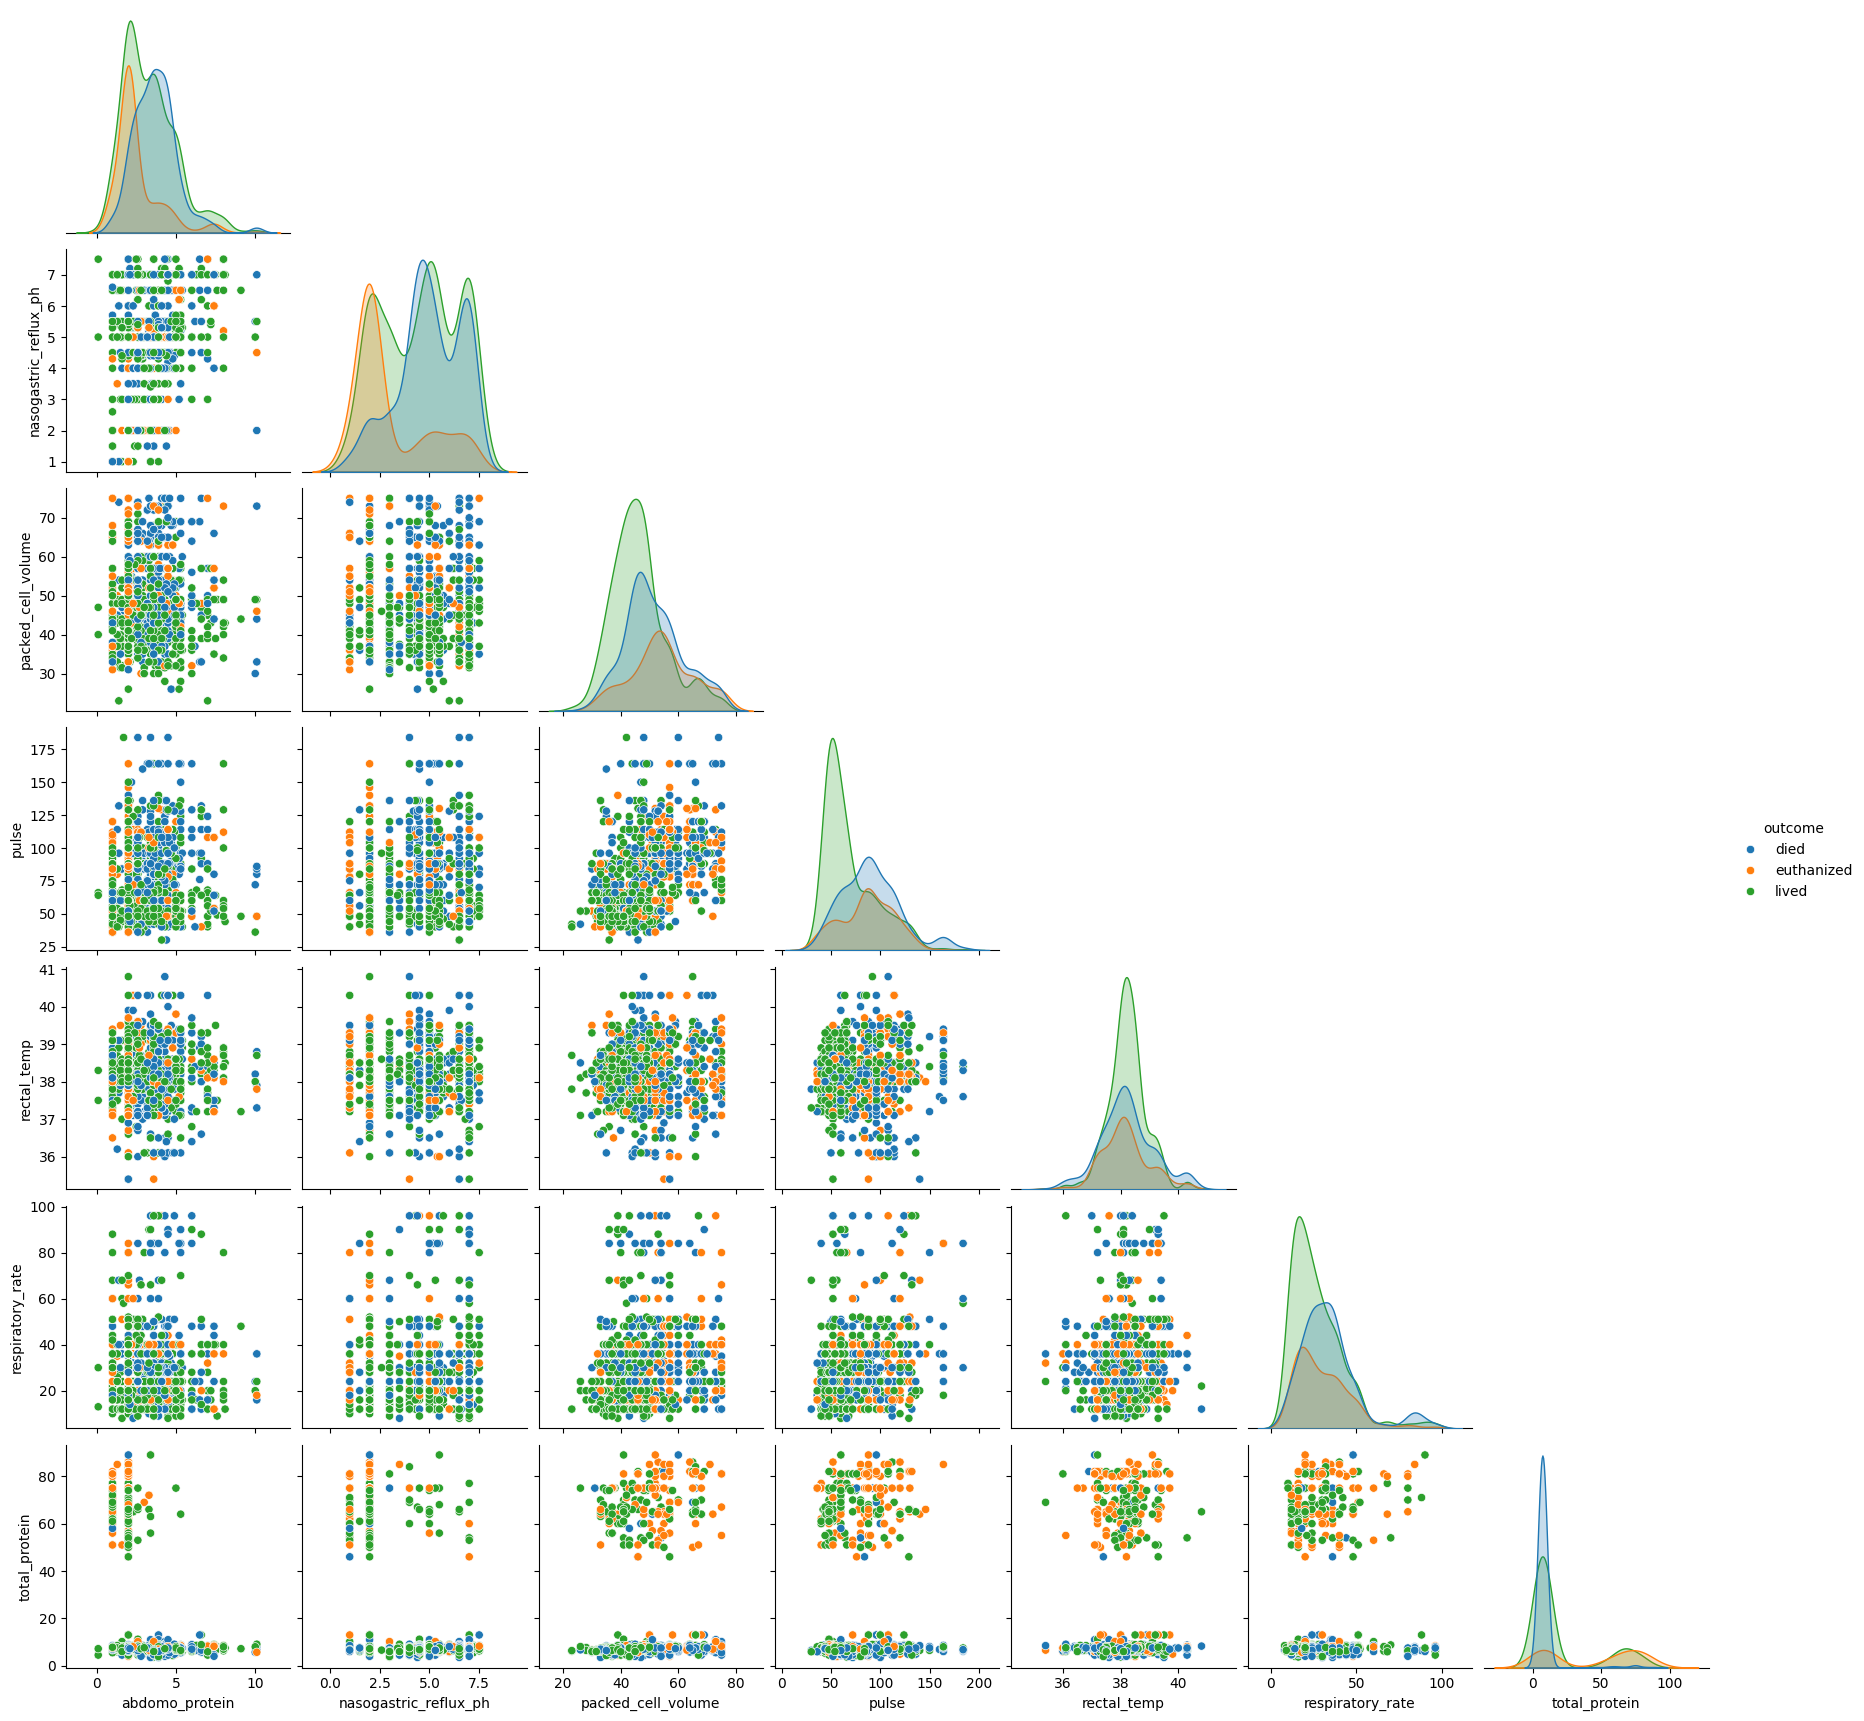

In [7]:
cols = numerical_cols.to_list()
cols.append('outcome')
sns.pairplot(train[cols], hue='outcome', corner=True)

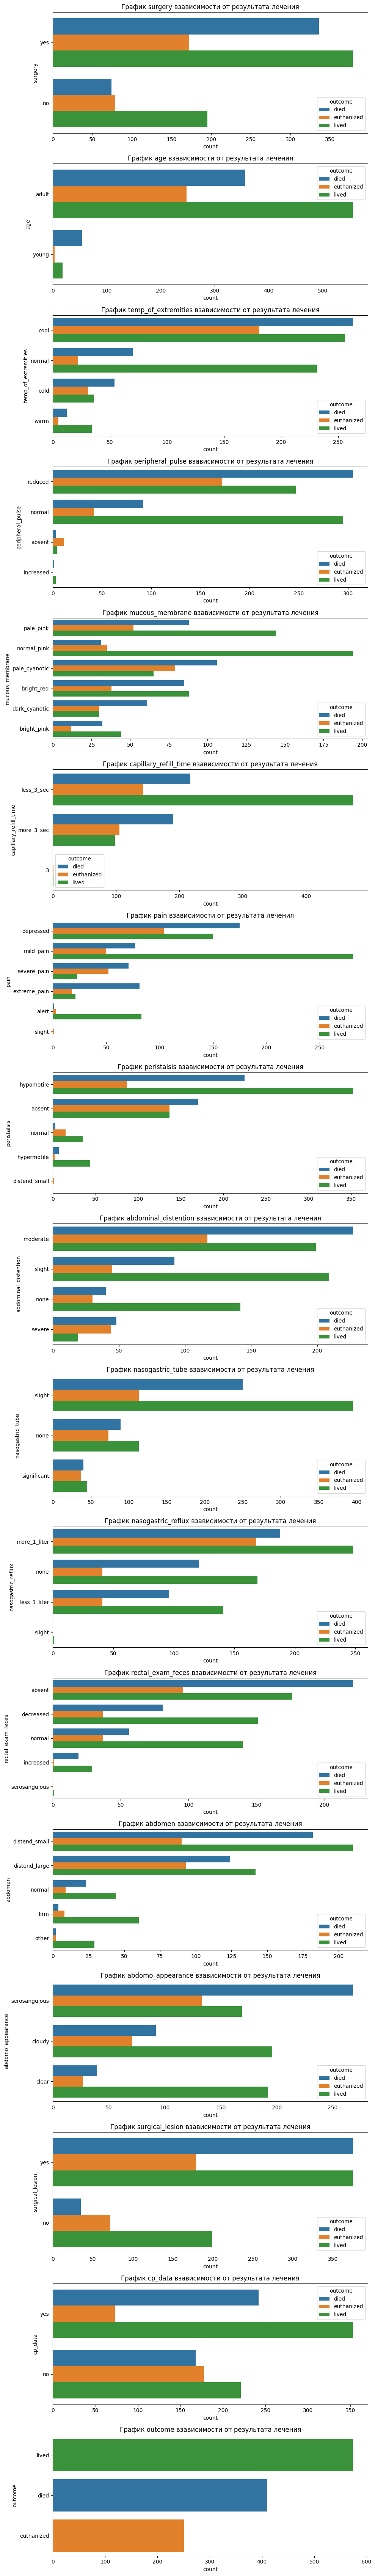

In [8]:
# Создаем категориальные фичи
fig, axs = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# Рисуем категориальные фичи взависимости от результата лечения
for i, col in enumerate(categorical_cols):
    sns.countplot(y=train[col], hue=train['outcome'], ax=axs[i], order=train[col].value_counts().index)
    axs[i].set_title(f'График {col} взависимости от результата лечения')

plt.tight_layout()
plt.show()

#  Выводы по анализу полученных данных
Основные пациенты клиники - это взрослые лошади (более 96%). Поэтому анализ молодых особей статистически не информативен.
1. Показатели пульса ('pulse') в среднем 60 ударов в минуту говорят о высокой вероятности выживаемости, 90 ударов в минуту - высокая вероятность смертности
2. Показатели эритроцитов ('packed_cell_volume') в среднем 45 говорят о высокой вероятности выживаемости, 52 - высокая вероятность смертности
3. Показатели абдоминоцентеза (abdomo_appearance) clear - говорят о высокой вероятности выживаемости, cloudy и serosanguinous высокая вероятность смертности
4. Показатели наполняемости капиляров кровью (capillary_refill_time)  less than 3 sec говорят о высокой вероятности выживаемости, more than 3 sec - высокая вероятность смертности
5. Показатели состояния регелярного опорожнения кишечника (rectal_examination_feces) normal и increased говорят о высокой вероятности выживаемости,
absent и decreased  - высокая вероятность смертности
6. Показатели боли (pain) - alert, no pain mild pain - говорят о высокой вероятности выживаемости, depressed и extreme_pain высокая вероятность смертности 
7. Показатели экстремальновысокой температуры  (temp_of_extremities) Normal и Warm говорят о высокой вероятности выживаемости, Cool и Cold высокая вероятность смертности

## Data Processing

In [9]:
# заменяем некорректные значения на Null
train["pain"] = train["pain"].replace('slight', np.nan)
train["peristalsis"] = train["peristalsis"].replace('distend_small', np.nan)
train["nasogastric_reflux"] = train["nasogastric_reflux"].replace('slight', np.nan)
train["rectal_exam_feces"] = train["rectal_exam_feces"].replace('serosanguious', np.nan)

# Ищем пропуски
train.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      45
peristalsis               21
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        22
nasogastric_reflux_ph      0
rectal_exam_feces        191
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [10]:
# Создаем словарь имя столбца: число(признак) на который надо 
# заменить пропуски
default_values = {
    'temp_of_extremities': 'normal',
    'peripheral_pulse': 'normal',
    'mucous_membrane': 'normal_pink',
    'capillary_refill_time': 'less_3_sec',
    'pain': 'alert',
    'peristalsis': 'normal',
    'abdominal_distention': 'none',
    'nasogastric_tube': 'none',
    'nasogastric_reflux': 'none',
    'rectal_exam_feces': 'normal',
    'abdomen': 'normal',
    'abdomo_appearance': 'clear'
}
# Заполняем пропуски
train = train.fillna(default_values)
print('Кол-во пропусков:', train.isnull().sum().sum())

# В признаках lesion_2 и lesion_3 практически все показатели равны нулю, поэтому они не информативны и подлежат удалению
print('Кол-во ненулевых значений в столбце leison_2:', (train['lesion_2'] != 0).sum())
print('Кол-во ненулевых значений в столбце leison_3:', (train['lesion_3'] != 0).sum())
train = train.drop(columns=['lesion_2', 'lesion_3'])

Кол-во пропусков: 0
Кол-во ненулевых значений в столбце leison_2: 8
Кол-во ненулевых значений в столбце leison_3: 2


encode categorical cols

In [12]:
print('размерность до преобразований:', train.shape)

# one hot encoding for categorical columns
train = pd.get_dummies(train, columns=categorical_cols.difference(['outcome']), dtype='int64')

# Запишем цифровые метки и их значения в виде словаря для признака leison
lesion_first_number = {
    "1": "gastric",  "2": "sm_intestine", "3": "lg_colon",
    "4": "lg_colon_and_cecum", "5": "cecum", "6": "transverse_colon",
    "7": "retum/descending_colon", "8": "uterus", "9": "bladder",
    "11": "all_intestinal_sites", "00": "none",
}
lesion_second_number = {
    "1": "simple", "2": "strangulation",
    "3": "inflammation", "4": "other",
    "0": "none",
}
lesion_third_number = {
    "1": "mechanical", "2": "paralytic", "0": "none",
}
lesion_fourth_number = {
    "1": "obturation", "2": "intrinsic", "3": "extrinsic",
    "4": "adynamic", "5": "volvulus/torsion", "6": "intussuption",
    "7": "thromboembolic", "8": "hernia", "9": "lipoma/slenic_incarceration",
    "10": "displacement", "0": "none",
}

# Пишем функцию, разделяющую цифровой набор симптомов на составляющие части
def lesion_splited(key):
    if key[:2] in ['00', '11']:
        first, second, third, fourth = key[:2], key[2], key[3], key[4:]
    elif key[0] == '0':
        first, second, third, fourth = 'none', 'none', 'none', 'none'
    else:
        first, second, third, fourth = key[0], key[1], key[2], key[3:]

    return [ lesion_first_number.get(first, "none"), lesion_second_number.get(second, "none"), 
            lesion_third_number.get(third, "none"), lesion_fourth_number.get(fourth, "none")]

# Заменяем цифровой набор симптомов на словесный список
train['lesion_1'] = train['lesion_1'].astype('string').apply(lesion_splited)

# Ключевые слова для преобразования для one hot encoding
lesion_keys = [
    "gastric",  "sm_intestine", "lg_colon",
    "lg_colon_and_cecum", "cecum", "transverse_colon",
    "retum/descending_colon", "uterus", "bladder",
    "all_intestinal_sites", 
    "simple", "strangulation",
    "inflammation", "other", "mechanical", "paralytic",
    "obturation", "intrinsic", "extrinsic",
    "adynamic", "volvulus/torsion", "intussuption",
    "thromboembolic", "hernia", "lipoma/slenic_incarceration",
    "displacement"]

# Преобразуем признак lesion_1 по ключам по циклу и удаляем исходный столбец
for key in lesion_keys:
    train[key] = train['lesion_1'].apply(lambda x: 1 if key in x else 0)
    
train.drop(columns=['lesion_1', 'hospital_number'], axis=1, inplace=True)
print('размерность после преобразований:', train.shape)

размерность до преобразований: (1235, 26)
размерность после преобразований: (1235, 90)


In [13]:
print('Количество дубликатов:', train.duplicated().sum())

Количество дубликатов: 0


In [14]:
train.to_csv(data_path/'processed_train_data.csv')

In [15]:
train.head(3)

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,outcome,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,age_adult,age_young,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,cp_data_no,cp_data_yes,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,surgery_no,surgery_yes,surgical_lesion_no,surgical_lesion_yes,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,gastric,sm_intestine,lg_colon,lg_colon_and_cecum,cecum,transverse_colon,retum/descending_colon,uterus,bladder,all_intestinal_sites,simple,strangulation,inflammation,other,mechanical,paralytic,obturation,intrinsic,extrinsic,adynamic,volvulus/torsion,intussuption,thromboembolic,hernia,lipoma/slenic_incarceration,displacement
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,died,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,euthanized,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,lived,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
